In [391]:
!pip install pandas
!pip install matplotlib
!pip install ydata-profiling
!pip install ipywidgets

# Ερώτημα 1

In [392]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [393]:
df = pd.read_csv('bankloan.csv')
df.describe()

,Row ID,id,member_id,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,...,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Unnamed: 50,36months,60months
count,368.000000,2.129990e+05,2.129990e+05,212999.000000,212999.000000,212999.000000,212999.000000,2.129990e+05,212999.000000,212999.000000,...,62365.000000,441.000000,439.000000,212999.000000,212999.000000,2.129990e+05,2.129990e+05,0.0,511.000000,511.000000
mean,184.500000,6.103515e+07,6.515927e+07,15257.965530,15257.965530,12.401658,440.842921,7.780071e+04,19.360817,0.347462,...,45.468356,107574.096327,18.320114,0.005718,261.951652,1.416537e+05,3.444425e+04,NaN,0.622309,0.377691
std,106.376689,4.734904e+06,5.215173e+06,8611.713377,8611.713377,4.249365,245.858646,8.188065e+04,31.925871,0.921209,...,22.645675,47921.057382,7.230012,0.081045,2215.188372,1.568766e+05,3.531827e+04,NaN,0.485285,0.485285
min,1.000000,5.670500e+04,7.082500e+04,1000.000000,1000.000000,5.320000,30.120000,0.000000e+00,0.000000,0.000000,...,0.000000,17950.000000,3.050000,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000,0.000000
25%,92.750000,5.783411e+07,6.158651e+07,8500.000000,8500.000000,9.170000,262.230000,4.700000e+04,12.660000,0.000000,...,28.000000,75001.000000,13.185000,0.000000,0.000000,3.143300e+04,1.460000e+04,NaN,0.000000,0.000000
50%,184.500000,6.137900e+07,6.549753e+07,14000.000000,14000.000000,12.290000,382.870000,6.500000e+04,18.720000,0.000000,...,45.000000,100000.000000,17.750000,0.000000,0.000000,8.138600e+04,2.510000e+04,NaN,1.000000,0.000000
75%,276.250000,6.503778e+07,6.956436e+07,20000.000000,20000.000000,14.650000,578.790000,9.250000e+04,25.520000,0.000000,...,63.000000,131000.000000,22.650000,0.000000,0.000000,2.097080e+05,4.260000e+04,NaN,1.000000,1.000000
max,368.000000,6.861687e+07,7.351969e+07,35000.000000,35000.000000,28.990000,1445.460000,9.000000e+06,9999.000000,30.000000,...,171.000000,410000.000000,43.860000,5.000000,380757.000000,4.127799e+06,1.641300e+06,NaN,1.000000,1.000000


In [394]:
# profile = ProfileReport( df, title = "Bankloan profiling report" )
# with open( "bankloan_profiling_report.html", "w" ) as f:
# 	f.write( profile.to_html() )

# Ερώτημα 2

## 1.
Από την αναφορά φαίνεται ότι το ελάχιστο ποσό είναι 1000, το μέσο 1527.966 και το μέγιστο 35000. Φαίνεται επίσης ότι η μεταβλητή είναι κβαντισμένη.

## 2.
Μπορεί να αφαιρεθεί σε αυτήν την περίπτωση δύο μεταβλητές το member_id, id, row_id, και το title. Το grade επειδή έχουμε το subgrade. 36months και 60months επειδή λείπει το 99.8 % των data. mths_since_last_delinq σε αυτή λείπει το 50%. mths_since_last_major_derog λείπουν το 70 %.



In [395]:
sub_grades = df["sub_grade"].unique()

# df = df.drop( columns = ['grade', 'sub_grade', 'int_rate', 'id', 'member_id', 'emp_title', 'title', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'] )

## 4.


In [396]:
## 4.
sub_grades = df["sub_grade"].unique()
sub_grades.sort()
print( "sub_grades:", sub_grades )

sub_grades: ['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']


In [397]:
passed_grades = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2' ]
df['target'] = np.where( df["sub_grade"].isin( passed_grades ), 1, 0 )
df = df.drop( columns = ['grade', 'sub_grade', 'int_rate', 'id', 'member_id', 'emp_title', 'title', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'Row ID'] )


# profile = ProfileReport( df, title = "Bankloan profiling report" )
# with open( "bankloan_profiling_report_w_target.html", "w" ) as f:
# 	f.write( profile.to_html() )

Αν ξαναδούμε το report τώρα, θα δούμε ότι οι περισσότεροι που δήλωσαν για δάνειο δεν το πήραν.

## 5.


[20000 11000  7000 ... 32525 34525  1625]
loan_amnt_binned
0-5k       0.248018
5k-10k     0.352425
10k-15k    0.290306
15k-20k    0.282640
20k-25k    0.283728
25k-30k    0.279096
30k-35k    0.127053
35k-40k         NaN
Name: target, dtype: float64


/tmp/ipykernel_30080/3888728286.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_approval_by_amount = df.groupby('loan_amnt_binned')['target'].mean()


<Axes: xlabel='loan_amnt_binned'>

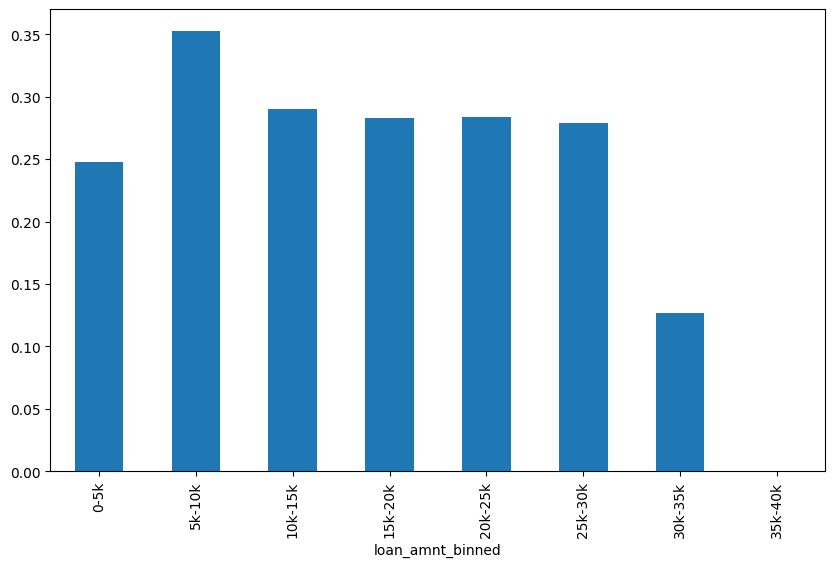

In [398]:
#organize loan_amount variable into bins
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]

labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k', '35k-40k']
df_loan_amount_binned = pd.cut( df['loan_amnt'], bins=bins, labels=labels, include_lowest=True )

print( ( df['loan_amnt'].unique() ) )
df['loan_amnt_binned'] = df_loan_amount_binned
loan_approval_by_amount = df.groupby('loan_amnt_binned')['target'].mean()
print( loan_approval_by_amount )
loan_approval_by_amount.plot(kind='bar', figsize=(10,6))

Από εδώ βλέππουμε ότι μόνο τα δάνεια 30-35k είναι η πιθανότητα κάτω από 15%.

# Ερώτημα 3


In [399]:
for column in df.columns:
	if df[column].hasnans and df[column].dtype in [np.float64, np.int64]:
		df[column] = df[column].fillna( df[column].mean() )

df = df.drop( columns = [ 'loan_amnt_binned', 'loan_amnt'] )
y = df['target']
x = df.drop( columns = ['target'] )

#do a min-max normalization
# for column in x.columns:
# 	if x[column].hasnans and x[column].dtype in [np.float64, np.int64]:
# 		x[column] = ( x[column] - x[column].min() ) / ( x[column].max() - x[column].min() )
le = LabelEncoder()
cat_cols = x.select_dtypes(include=['object']).columns
for col in cat_cols:
	x[col] = x[col].astype(str)
	x[col] = le.fit_transform(x[col])

 Από παρατήρηση φαίνεται ότι τα δεδομένα δεν έχουν outliers οπότε θα πάρω την πιο απλή κανονικοποίηση.

## 2.

In [400]:
testdata_size = 0.3

x_data, x_test, y_data, y_test = train_test_split( x, y, test_size = testdata_size, random_state = 42, stratify=y )

## 3.
Δεν μπορώ να ξεχωρίσω κάποιο χαρακτηριστικό αν είναι σημαντικό ή όχι οπότε θα χρησιμοποιήσω τον random forest classifier καθώς τα χαρακτηριστικά είναι πάρα πολλά και το bagging που γίνεται εσωτερικά στο random forest θα μας οδηγήσει συνολικά σε μία καλή λύση

In [401]:
model = RandomForestClassifier( n_estimators = 100, random_state = 42, n_jobs = -1 )
print(x_data.select_dtypes(include=['object']).columns)

model.fit( x_data, y_data )
y_pred = model.predict( x_test )
print( classification_report( y_test, y_pred ) )


Index([], dtype='object')
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     45513
           1       0.96      0.89      0.92     18387

    accuracy                           0.96     63900
   macro avg       0.96      0.94      0.95     63900
weighted avg       0.96      0.96      0.96     63900



## 4.
Εδώ μας ενδιαφέρει η f1 περισσότερο καθώς αν κάναμε optimize για recall μπορεί η τράπεζα να κατέληγε να μην δίνει καθόλου δάνεια επειδή θα ήταν πιο αμυντική η στρατιγική του ταξινομητή αλλά η τράπεζα από την άλλη θέλει να δίνει δάνεια

# Ερώτημα 4
Από την προηγούμενη ταξινόμηση

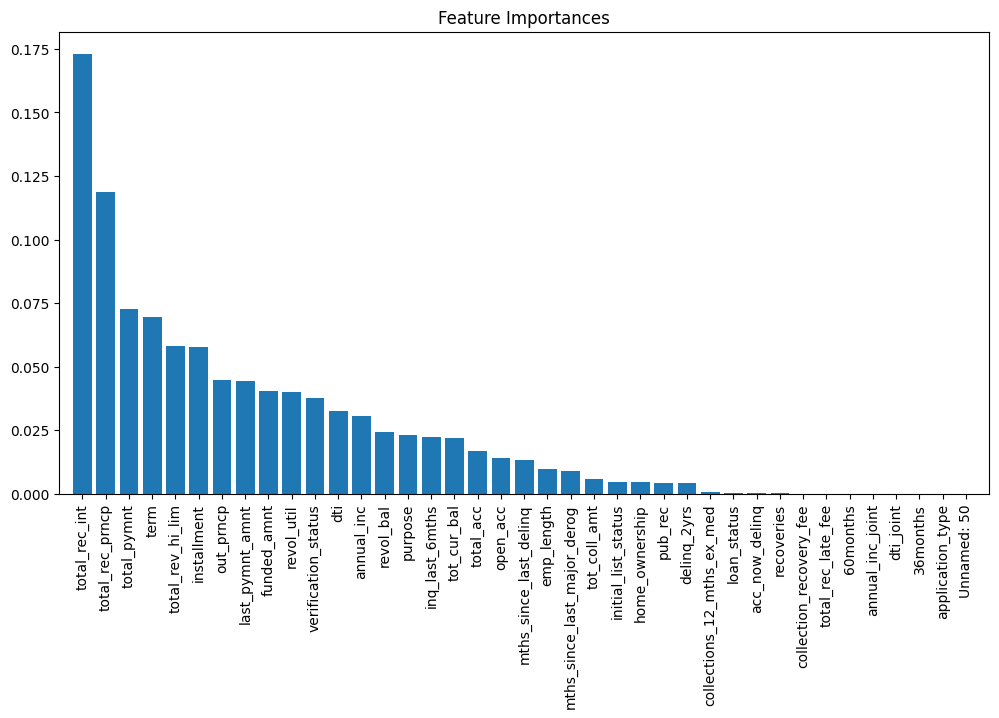

Feature importances:
Index(['total_rec_int', 'total_rec_prncp', 'total_pymnt', 'term',
       'total_rev_hi_lim', 'installment', 'out_prncp', 'last_pymnt_amnt',
       'funded_amnt', 'revol_util', 'verification_status', 'dti', 'annual_inc',
       'revol_bal', 'purpose'],
      dtype='object')


In [402]:
#print histogram of feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), importances[indices], align='center')
plt.xticks(range(x.shape[1]), x.columns[indices], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()

print( "Feature importances:" )
print( x.columns[indices][0:15] )


In [403]:
#print correlation matrix

corr_matrix = x.corr()
corr_matrix[x.columns[indices][0:15]]

,total_rec_int,total_rec_prncp,total_pymnt,term,total_rev_hi_lim,installment,out_prncp,last_pymnt_amnt,funded_amnt,revol_util,verification_status,dti,annual_inc,revol_bal,purpose
funded_amnt,0.613110,0.421205,0.550695,0.401795,0.359058,0.942279,9.687111e-01,0.508858,1.000000,0.127083,0.043106,0.005895,0.276902,0.336105,-0.162206
term,0.410082,-0.105769,0.071351,1.000000,0.066497,0.123242,4.167999e-01,0.067104,0.401795,0.095043,-0.038056,0.031811,0.038348,0.085982,-0.065981
installment,0.569315,0.491738,0.588989,0.123242,0.329889,1.000000,8.995714e-01,0.541527,0.942279,0.127093,0.089269,0.001758,0.271427,0.315816,-0.138605
emp_length,-0.050606,-0.035596,-0.045620,-0.047440,-0.053307,-0.069531,-7.998666e-02,-0.040023,-0.081385,-0.024214,0.052250,0.009453,-0.065947,-0.056182,-0.002697
home_ownership,-0.085568,-0.074690,-0.088380,-0.094325,-0.185733,-0.150887,-1.816827e-01,-0.079876,-0.181770,-0.019867,0.089263,-0.003916,-0.124088,-0.163919,0.034760
annual_inc,0.113221,0.143358,0.151893,0.038348,0.260857,0.271427,2.678329e-01,0.156013,0.276902,0.040534,-0.000478,-0.047313,1.000000,0.258879,-0.003371
verification_status,0.103796,-0.011107,0.031416,-0.038056,-0.069671,0.089269,3.816848e-02,0.050568,0.043106,0.163713,1.000000,0.020629,-0.000478,0.020179,0.073084
loan_status,-0.059389,-0.001104,-0.052785,-0.020646,0.019686,-0.005661,1.951097e-01,-0.005706,0.001690,-0.014556,-0.020901,-0.006647,0.010643,0.008989,-0.020685
purpose,-0.049044,-0.086183,-0.083552,-0.065981,-0.070745,-0.138605,-1.596807e-01,-0.073281,-0.162206,-0.095138,0.073084,-0.014918,-0.003371,-0.078587,1.000000
dti,0.021059,-0.016241,-0.004666,0.031811,0.022138,0.001758,7.125670e-03,-0.001799,0.005895,0.049648,0.020629,1.000000,-0.047313,0.036919,-0.014918


Χαρακτηριστικά φαίνεται ότι η μεταβλητή funded_amnt με την total_rec_int ότι έχουν εντονη συσχέτηση. Πιθανώς, να πρέπει να αφαιρεθούν. Αν κοιτάξουμε και την σημασία τους θα δούμε ότι όντως συνδέονται.

In [404]:
x_cp = x.drop( columns = [ 'funded_amnt', 'installment'])
testdata_size = 0.3

x_data, x_test, y_data, y_test = train_test_split( x_cp, y, test_size = testdata_size, random_state = 42, stratify=y )
model.fit( x_data, y_data )
y_pred = model.predict( x_test )
print( classification_report( y_test, y_pred ) )


              precision    recall  f1-score   support

           0       0.94      0.98      0.96     45513
           1       0.94      0.86      0.90     18387

    accuracy                           0.94     63900
   macro avg       0.94      0.92      0.93     63900
weighted avg       0.94      0.94      0.94     63900



Η ποσότητες που φαίνεται να έχουν μεγάλο correlation με τις υπόλοιπες έιναι το funded_amnt και installment